<a href="https://colab.research.google.com/github/fsoria/Machine-Learning-Prediction-bank-churn/blob/main/Actividad_practica_FeatureSelection_Soria_Fernanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Presentación del problema

**Contexto comercial**

El sector bancario es altamente competitivo y la retención de clientes es fundamental. Adquirir nuevos clientes es más costoso que retener a los existentes.

**Problema comercial**

Existe una tasa de abandono de clientes que puede impactar negativamente la rentabilidad del banco. Es necesario entender las causas de este abandono para tomar medidas preventivas.

**Objetivo**


El objetivo principal es crear un modelo de clasificación que prediga con precisión si un cliente abandonará o no el banco. Además, se busca analizar el conjunto de datos para identificar los factores clave que influyen en la decisión de abandono y realizar recomendaciones estratégicas que permitan al banco retener a sus clientes y minimizar pérdidas.

Presentacion de temas en google slices
https://docs.google.com/presentation/d/1hUFK3GrIO6d0KsG88nw_24c1PIy4mvBMJyVrF-aU4TI/edit?usp=sharing

#Metadatos

Dataset: https://github.com/fsoria/Machine-Lerarning-Prediction-bank-churn-II/blob/main/BankChurners.csv

Fuente: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers/data

**Descripcion de variables**


*   **CLIENTNUM**: Número de cliente (identificador único)
*   **Customer_Age**: Edad del cliente en años.
*   **Gender**: Género del cliente (Masculino o Femenino).
*   **Dependent_count**: Número de personas que dependen del cliente.
*   **Education_Level**: Nivel de educación del cliente.
*   **Marital_Status**: Estado civil del cliente.
*   **Income_Category**: Categoría de ingresos anuales del cliente.
*   **Card_Category**: Tipo de tarjeta de crédito del cliente.
*   **Months_on_book**: Número de meses que el cliente ha sido cliente del banco.
*   **Total_Relationship_Count**: Número total de productos que el cliente tiene con el banco.
*   **Months_Inactive_12_mon**: Número de meses que el cliente ha estado inactivo en los últimos 12 meses.
*   **Contacts_Count_12_mon**: Número de veces que el cliente ha contactado al banco en los últimos 12 meses.
*   **Credit_Limit**: Límite de crédito de la tarjeta de crédito del cliente.
*   **Total_Revolving_Bal**: Saldo rotatorio total en la tarjeta de crédito del cliente.
*   **Avg_Open_To_Buy**: Promedio de línea de crédito disponible para el cliente.
*   **Total_Amt_Chng_Q4_Q1**: Cambio en el monto total de transacciones entre el cuarto trimestre y el primer trimestre.
*   **Total_Trans_Amt**: Monto total de transacciones realizadas por el cliente en los últimos 12 meses.
*   **Total_Trans_Ct**: Número total de transacciones realizadas por el cliente en los últimos 12 meses.
*   **Total_Ct_Chng_Q4_Q1**: Cambio en el número total de transacciones entre el cuarto trimestre y el primer trimestre.
*   **Avg_Utilization_Ratio**: Tasa promedio de utilización del crédito (saldo rotatorio total / límite de crédito).
*   **Attrition_Flag**: Indica si el cliente ha abandonado el banco (Attrited Customer) o no (Existing Customer).


#Transformacion de datos

**Principales Librerías**

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

**Importación de datos**

In [2]:
url = "https://raw.githubusercontent.com/fsoria/Machinge-Lerarning---Bank-Churners-II/refs/heads/main/BankChurners.csv"
dataset = pd.read_csv(url)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [4]:
dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 21
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,NaN
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,NaN
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,NaN
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,NaN
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,NaN


In [5]:
dataset.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 21
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,0.0
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,NaN
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,NaN
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,NaN
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,NaN
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,NaN
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,NaN
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,NaN


In [6]:
dataset.isna().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


**Transformación y limpieza de datos**

In [7]:
dataset['Unnamed: 21'].unique()

array([nan])

In [8]:
dataset.drop(columns=['Unnamed: 21'], inplace=True)


In [9]:
dataset.drop(columns=["CLIENTNUM"], inplace=True)

#Análisis exploratorio de datos

###Analisis univariado

**Abandono de clientes**

In [10]:
attrition_counts = dataset.Attrition_Flag.value_counts()

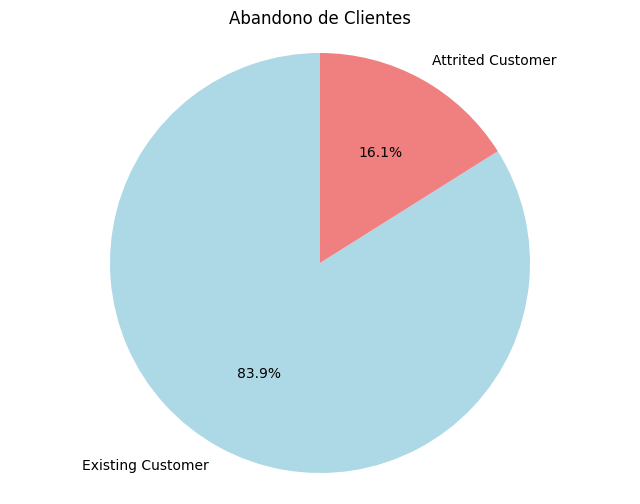

In [11]:
plt.figure(figsize=(8, 6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Abandono de Clientes')
plt.axis('equal')
plt.show()

**Edad de clientes**

In [12]:
dataset.Customer_Age.describe()

,Customer_Age
count,10127.000000
mean,46.325960
std,8.016814
min,26.000000
25%,41.000000
50%,46.000000
75%,52.000000
max,73.000000


Hacemos un análisis de acuerdo a las medidas descriptivas a traves de .describe(), con el objetivo identificar outliers, verificar la razonabilidad de los datos y obtener la edad promedio de 46 años.

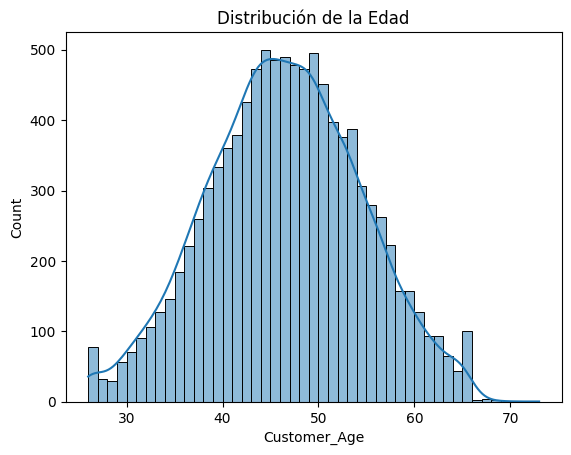

In [13]:
sns.histplot(dataset['Customer_Age'], kde=True)
plt.title("Distribución de la Edad")
plt.show()

El gráfico de distribucion de edades nos muestra que la mayor acumulacion de edades se concentra entre el rango de 30 y 50 años. A partir de los 50 años la cantidad de clientes disminuye.

**Categorías de ingresos de clientes**

In [14]:
dataset['Income_Category'].value_counts(normalize=True) * 100


,proportion
Income_Category,
Less than $40K,35.163425
$40K - $60K,17.675521
$80K - $120K,15.157500
$60K - $80K,13.844179
Unknown,10.980547
$120K +,7.178829


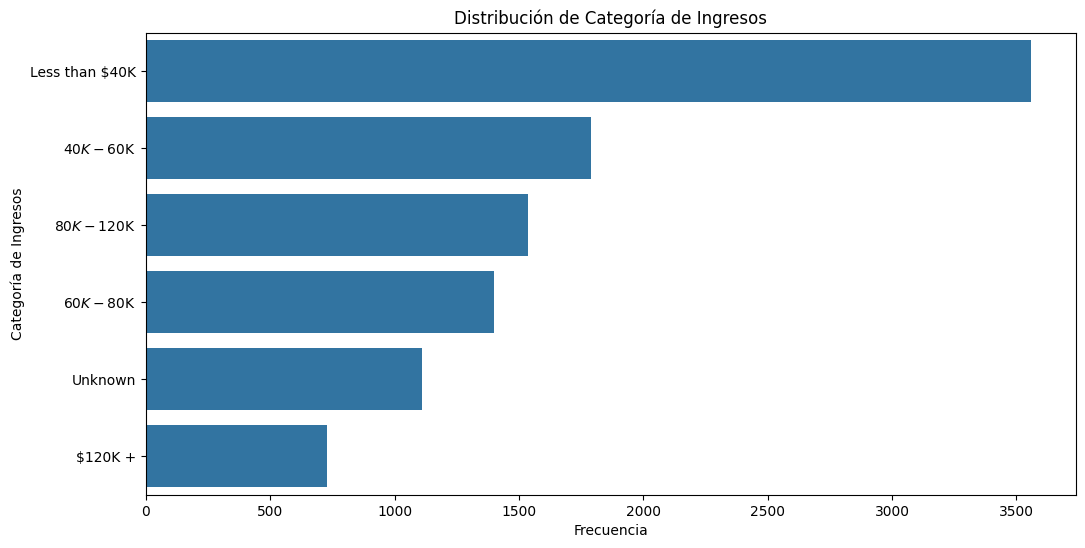

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, y='Income_Category', order=dataset['Income_Category'].value_counts().index)
plt.title("Distribución de Categoría de Ingresos")
plt.xlabel("Frecuencia")
plt.ylabel("Categoría de Ingresos")
plt.show()

El gráfico muestra la distribución de las categorías de ingresos agrupadas en 6 grandes grupos. Se observa que la mayor concentración de clientes se encuentra en la categoría "Less than $40K". Le sigue en frecuencia la categoría "$40K - $60K", mostrando una distribución descendente en las demás categorías.

**Estado civil por cliente**

<ipython-input-16-e6a8862a1e8a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset['Marital_Status'], palette="Pastel1")


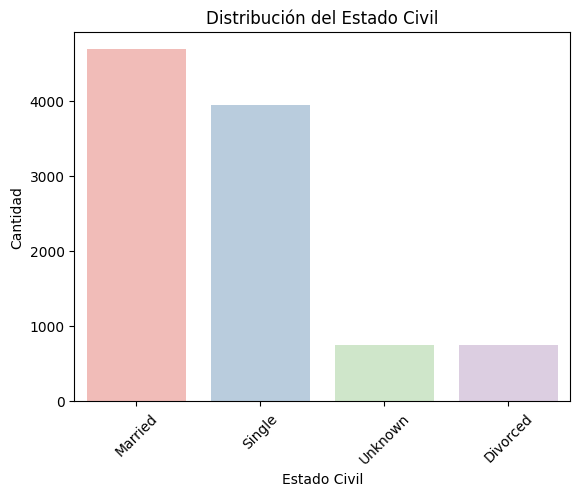

In [16]:
sns.countplot(x=dataset['Marital_Status'], palette="Pastel1")
plt.title("Distribución del Estado Civil")
plt.xlabel("Estado Civil")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()


**Nivel de educacion por cliente**

<ipython-input-17-76d80f19c5d6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset['Education_Level'], palette="Set3")


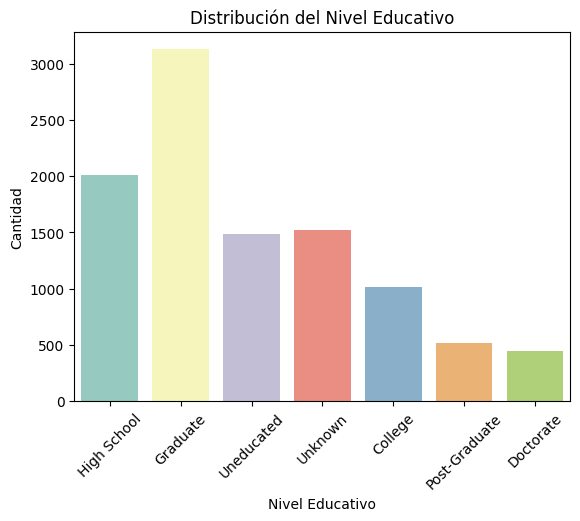

In [17]:
sns.countplot(x=dataset['Education_Level'], palette="Set3")
plt.title("Distribución del Nivel Educativo")
plt.xlabel("Nivel Educativo")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()


**Cantidad de productos por clientes**

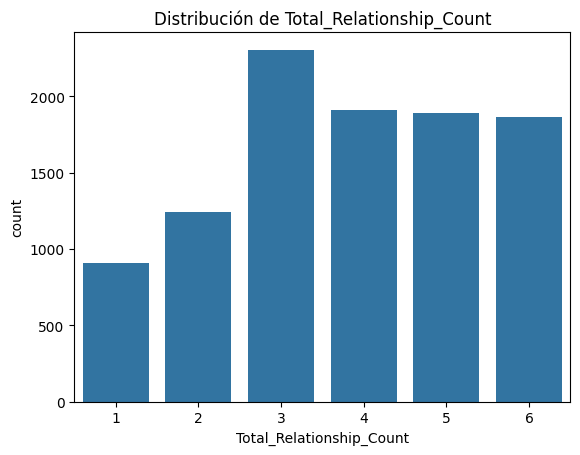

In [18]:
sns.countplot(x='Total_Relationship_Count', data=dataset)
plt.title('Distribución de Total_Relationship_Count')
plt.show()

El gráfico muestra la distribución de la cantidad de productos bancarios por cliente. Se observa que la mayoría de los clientes tienen 3 productos, representando la mayor concentración. Las cantidades de clientes con 4, 5 y 6 productos son menores, pero similares entre sí.

**Límite de credito por cliente**

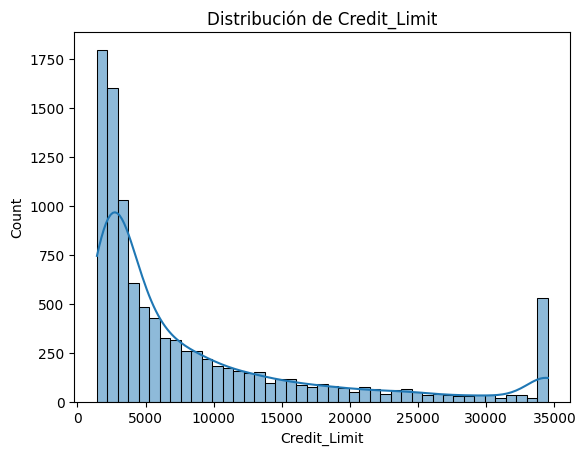

In [19]:
sns.histplot(dataset['Credit_Limit'], kde=True)
plt.title("Distribución de Credit_Limit")
plt.show()

El histograma muestra una distribución del límite de crédito con la mayoría de clientes en límites bajos. Se observa un pico de frecuencia en 1750 clientes para límites de crédito menores a 5000, luego decrece y remonta en límites mayores a 35000 pero para una menor cantidad de clientes.

**Categoria de tarjetas por clientes**


<ipython-input-20-1be5c7706f0a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset['Card_Category'], palette="Set2")


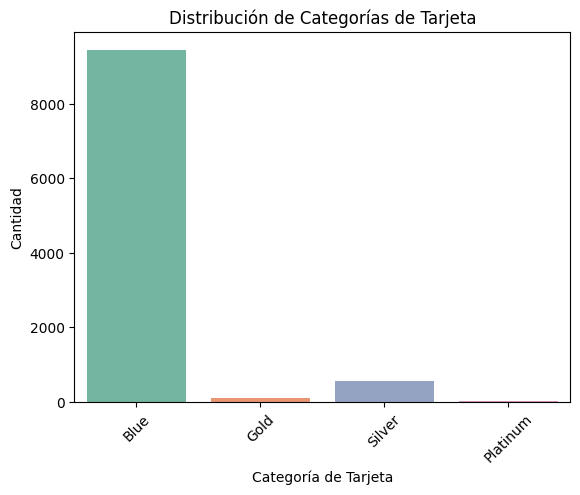

In [20]:
sns.countplot(x=dataset['Card_Category'], palette="Set2")
plt.title("Distribución de Categorías de Tarjeta")
plt.xlabel("Categoría de Tarjeta")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()


**Cantidad de transacciones por clientes**

<ipython-input-21-2166f271ac66>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(dataset['Total_Trans_Ct'], bins=30, kde=True, palette="Set2")


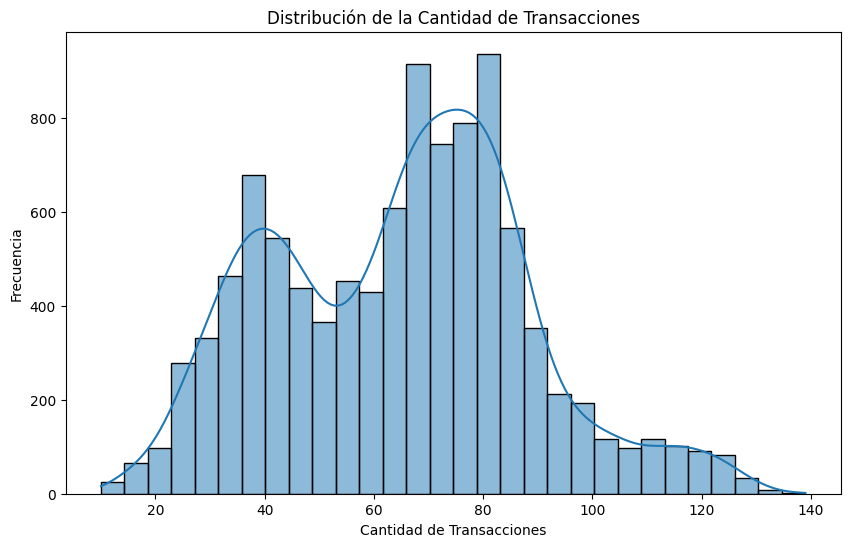

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Total_Trans_Ct'], bins=30, kde=True, palette="Set2")
plt.title('Distribución de la Cantidad de Transacciones')
plt.xlabel('Cantidad de Transacciones')
plt.ylabel('Frecuencia')
plt.show()

El gráfico muestra que la mayoría de los clientes realizan entre 40 y 80 transacciones. La distribución indica que pocos clientes realizan menos de 20 o más de 120 transacciones.

**Cantidad de meses inactivos por cliente**

<ipython-input-22-4c33e03bab7a>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(y='Months_Inactive_12_mon', data=dataset, bins=12, palette="Set2")


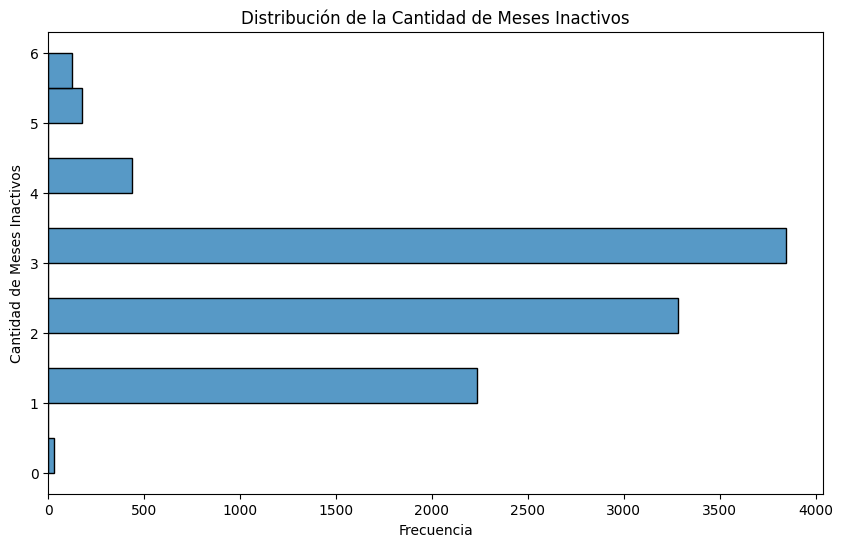

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(y='Months_Inactive_12_mon', data=dataset, bins=12, palette="Set2")
plt.title('Distribución de la Cantidad de Meses Inactivos')
plt.ylabel('Cantidad de Meses Inactivos')
plt.xlabel('Frecuencia')
plt.show()

El grafico muestra que La mayoría de clientes tienen entre 2 y 3 meses de inactividad en los últimos 12 meses. Hay un pico en la frecuencia de clientes que tienen 3 meses de inactividad. Pocos clientes estuvieron inactivos por un mes o más de 4 meses.

###Analisis bivariado###

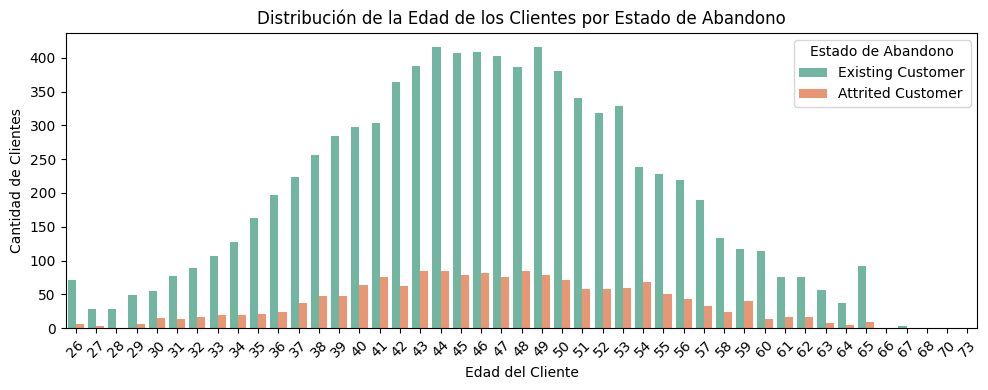

In [23]:
plt.figure(figsize=(10, 4))

sns.countplot(data=dataset, x='Customer_Age', hue='Attrition_Flag', palette="Set2")
plt.title('Distribución de la Edad de los Clientes por Estado de Abandono')
plt.xlabel('Edad del Cliente')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45)
plt.legend(title='Estado de Abandono', loc='upper right')
plt.tight_layout()
plt.show()


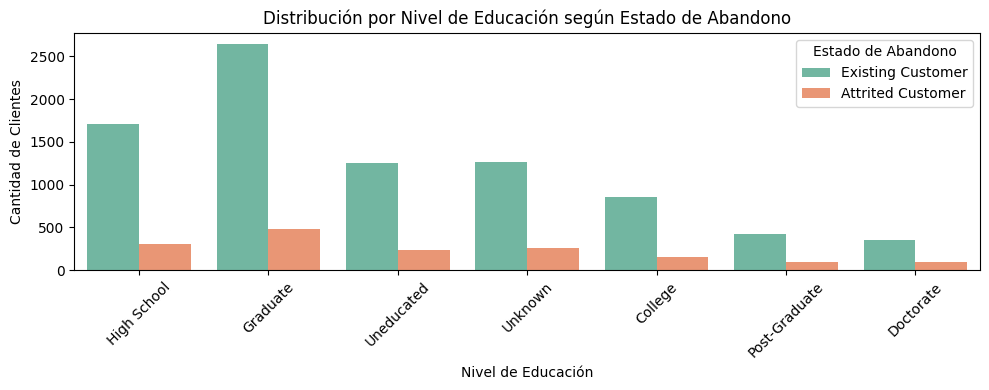

In [24]:
plt.figure(figsize=(10, 4))
sns.countplot(data=dataset, x='Education_Level', hue='Attrition_Flag', palette="Set2")
plt.title('Distribución por Nivel de Educación según Estado de Abandono')
plt.xlabel('Nivel de Educación')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45)
plt.legend(title='Estado de Abandono')
plt.tight_layout()
plt.show()


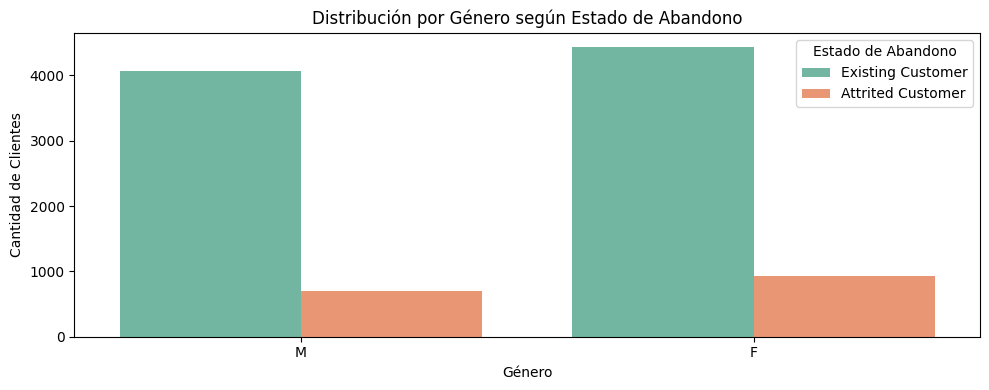

In [25]:
plt.figure(figsize=(10, 4))
sns.countplot(data=dataset, x='Gender', hue='Attrition_Flag', palette="Set2")
plt.title('Distribución por Género según Estado de Abandono')
plt.xlabel('Género')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Estado de Abandono')
plt.tight_layout()
plt.show()


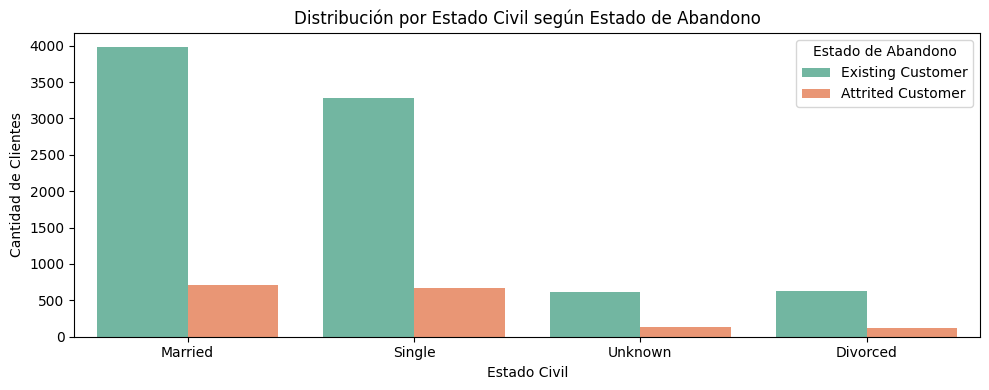

In [26]:
plt.figure(figsize=(10, 4))
sns.countplot(data=dataset, x='Marital_Status', hue='Attrition_Flag', palette="Set2")
plt.title('Distribución por Estado Civil según Estado de Abandono')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Estado de Abandono')
plt.tight_layout()
plt.show()


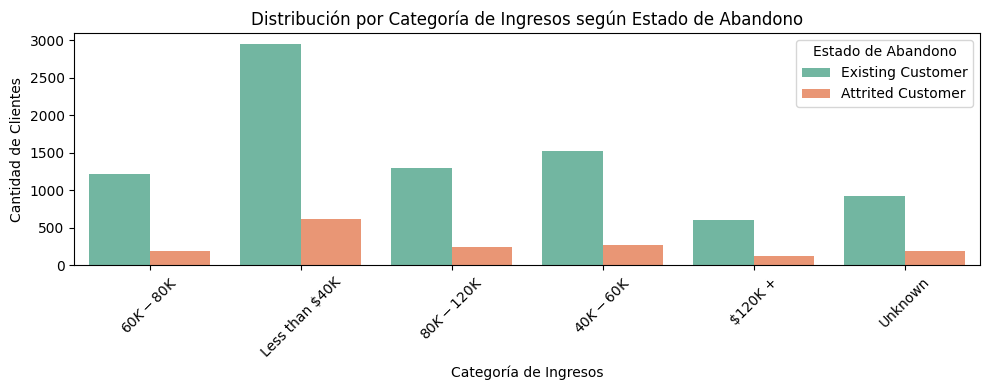

In [27]:
plt.figure(figsize=(10, 4))
sns.countplot(data=dataset, x='Income_Category', hue='Attrition_Flag', palette="Set2")
plt.title('Distribución por Categoría de Ingresos según Estado de Abandono')
plt.xlabel('Categoría de Ingresos')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45)
plt.legend(title='Estado de Abandono')
plt.tight_layout()
plt.show()


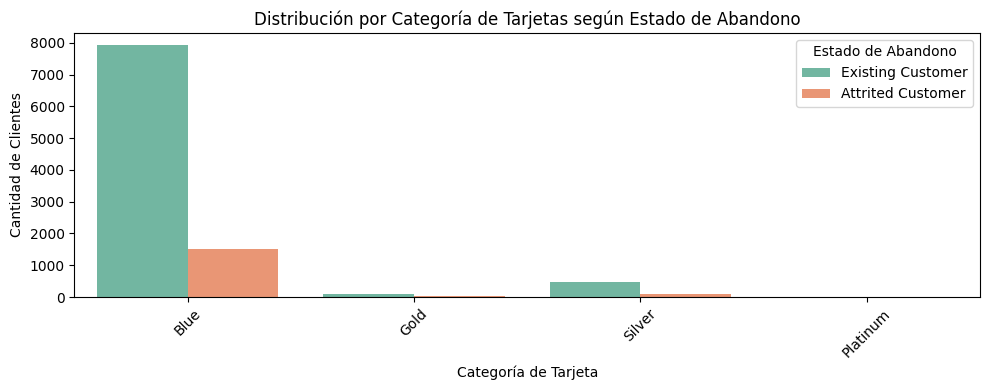

In [28]:
plt.figure(figsize=(10, 4))
sns.countplot(data=dataset, x='Card_Category', hue='Attrition_Flag', palette="Set2")
plt.title('Distribución por Categoría de Tarjetas según Estado de Abandono')
plt.xlabel('Categoría de Tarjeta')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45)
plt.legend(title='Estado de Abandono')
plt.tight_layout()
plt.show()


##Análisis multivariado

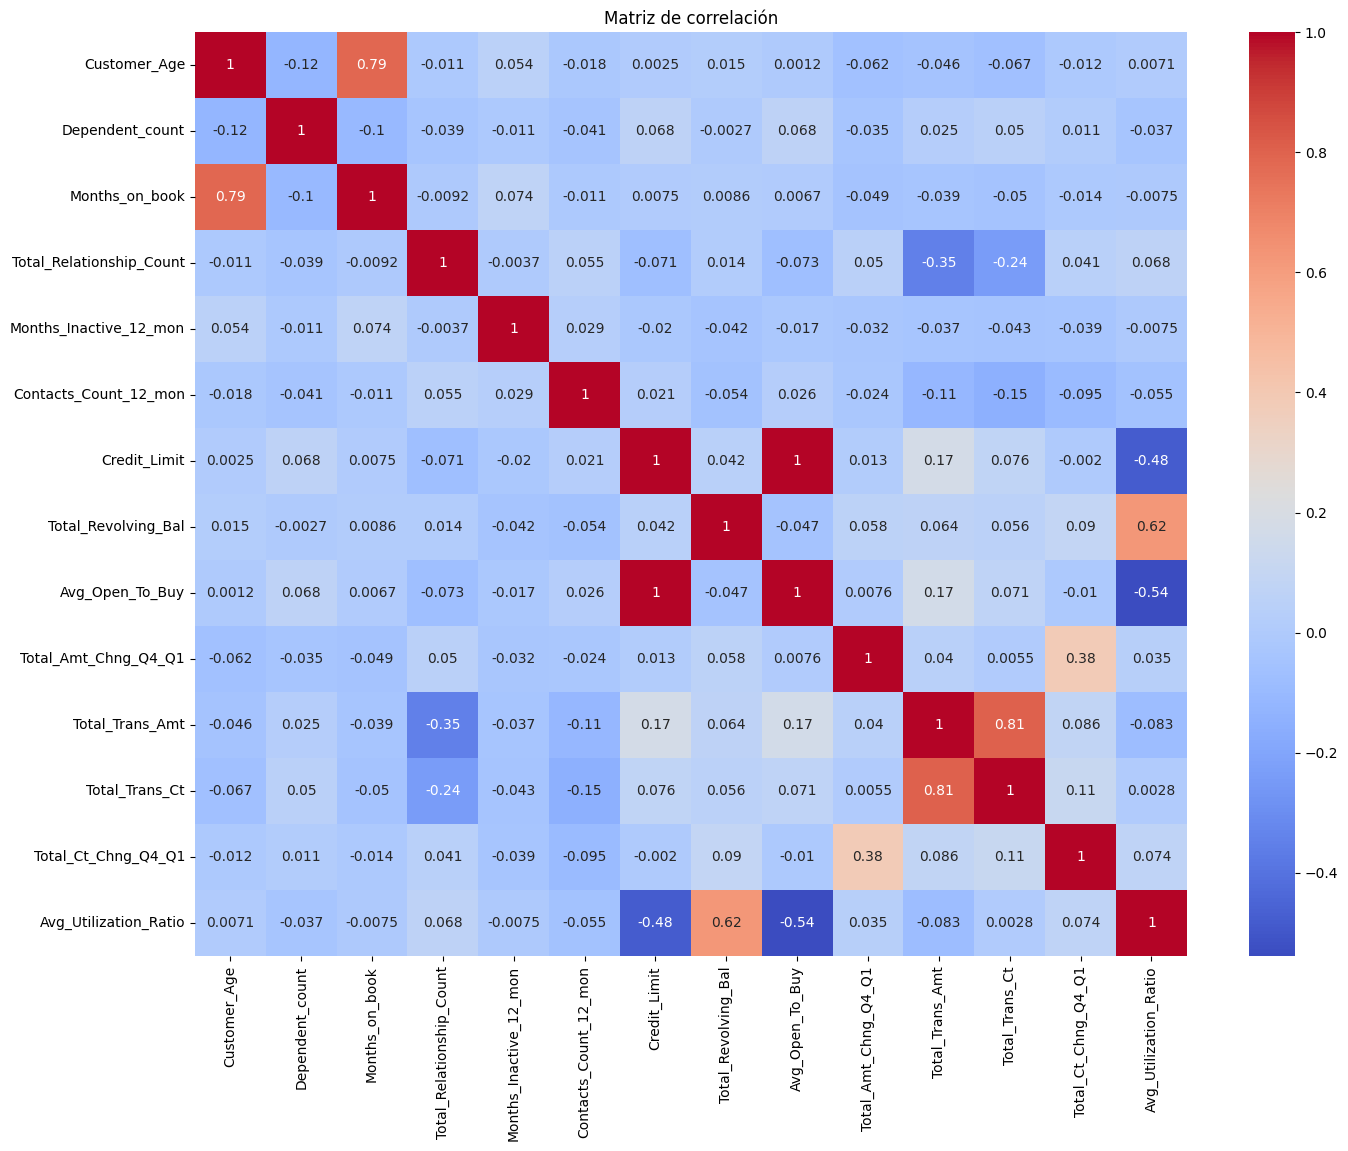

In [29]:
correlation_matrix = dataset.corr(numeric_only=True)

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

#Encoding de variables categóricas

In [30]:
label_encoder = LabelEncoder()

dataset_encoded = pd.get_dummies(dataset, columns=['Income_Category','Gender', 'Education_Level', 'Marital_Status', 'Card_Category' ], drop_first=True)


In [31]:
dataset_encoded.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,Existing Customer,45,3,39,5,1,3,12691.0,777,11914.0,...,True,False,False,False,True,False,False,False,False,False
1,Existing Customer,49,5,44,6,1,2,8256.0,864,7392.0,...,False,False,False,False,False,True,False,False,False,False
2,Existing Customer,51,3,36,4,1,0,3418.0,0,3418.0,...,False,False,False,False,True,False,False,False,False,False
3,Existing Customer,40,4,34,3,4,1,3313.0,2517,796.0,...,True,False,False,False,False,False,True,False,False,False
4,Existing Customer,40,3,21,5,1,0,4716.0,0,4716.0,...,False,False,True,False,True,False,False,False,False,False


In [32]:
dataset_encoded.dtypes


,0
Attrition_Flag,object
Customer_Age,int64
Dependent_count,int64
Months_on_book,int64
Total_Relationship_Count,int64
Months_Inactive_12_mon,int64
Contacts_Count_12_mon,int64
Credit_Limit,float64
Total_Revolving_Bal,int64
Avg_Open_To_Buy,float64


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_to_scale = ['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt']
dataset[cols_to_scale] = scaler.fit_transform(dataset[cols_to_scale])


#Feature selection

In [34]:
X = dataset_encoded.drop(columns=['Attrition_Flag'])
y = dataset_encoded['Attrition_Flag']


#Split train test

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [36]:
X_train.shape

(7088, 32)

In [37]:
X_test.shape

(3039, 32)

#Model selection

Entreno a los modelos con sus parametros por defecto

**Arbol de decision**

In [38]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

cv_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=kfold, scoring="accuracy", n_jobs=-1)
print(f"Accuracy CV (DecisionTree): {np.mean(cv_scores_dt):.4f} ± {np.std(cv_scores_dt):.4f}")

# Entrenamiento y evaluación
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print(f"Accuracy Test (DecisionTree): {accuracy_score(y_test, y_pred_dt):.4f}")

Accuracy CV (DecisionTree): 0.9350 ± 0.0062
Accuracy Test (DecisionTree): 0.9286


**Random forest**

In [39]:
rf_model = RandomForestClassifier(random_state=42)

cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring="accuracy", n_jobs=-1)
print(f"Accuracy CV (RandomForest): {np.mean(cv_scores_rf):.4f} ± {np.std(cv_scores_rf):.4f}")

# Entrenamiento y evaluación
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(f"Accuracy Test (RandomForest): {accuracy_score(y_test, y_pred_rf):.4f}")

Accuracy CV (RandomForest): 0.9533 ± 0.0068
Accuracy Test (RandomForest): 0.9516


**Gradient Boost**

In [40]:
gb_model = GradientBoostingClassifier(random_state=42)

cv_scores_gb = cross_val_score(gb_model, X_train, y_train, cv=kfold, scoring="accuracy", n_jobs=-1)
print(f"Accuracy CV (GradientBoosting): {np.mean(cv_scores_gb):.4f} ± {np.std(cv_scores_gb):.4f}")

# Entrenamiento y evaluación
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print(f"Accuracy Test (GradientBoosting): {accuracy_score(y_test, y_pred_gb):.4f}")


Accuracy CV (GradientBoosting): 0.9650 ± 0.0049
Accuracy Test (GradientBoosting): 0.9658


**KNN**

In [41]:
knn_model = KNeighborsClassifier()

cv_scores_knn = cross_val_score(knn_model, X_train, y_train, cv=kfold, scoring="accuracy", n_jobs=-1)
print(f"Accuracy CV (KNeighbors): {np.mean(cv_scores_knn):.4f} ± {np.std(cv_scores_knn):.4f}")

# Entrenamiento y evaluación
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print(f"Accuracy Test (KNeighbors): {accuracy_score(y_test, y_pred_knn):.4f}")



Accuracy CV (KNeighbors): 0.8956 ± 0.0051
Accuracy Test (KNeighbors): 0.8845


**Regresion logistica**

In [42]:
logreg_model = LogisticRegression(random_state=42, max_iter=1000)

cv_scores_logreg = cross_val_score(logreg_model, X_train, y_train, cv=kfold, scoring="accuracy", n_jobs=-1)
print(f"Accuracy CV (LogisticRegression): {np.mean(cv_scores_logreg):.4f} ± {np.std(cv_scores_logreg):.4f}")

# Entrenamiento y evaluación
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

print(f"Accuracy Test (LogisticRegression): {accuracy_score(y_test, y_pred_logreg):.4f}")

Accuracy CV (LogisticRegression): 0.8964 ± 0.0057
Accuracy Test (LogisticRegression): 0.8868


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Grafico de barras de comparacion de accuracy de cada modelo**

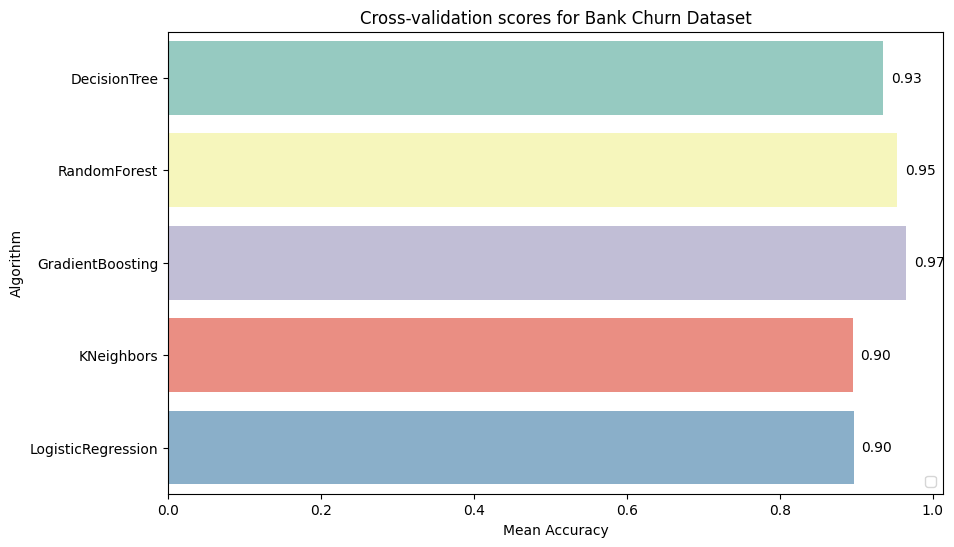

In [43]:
random_state = 42
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

# Lista de clasificadores
classifiers = []
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state=random_state, max_iter=1000))

# Validación cruzada
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, y=y_train, scoring="accuracy", cv=kfold, n_jobs=-1))

# Calcular medias y desviaciones estándar de las puntuaciones
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

# Crear un DataFrame con los resultados
cv_res = pd.DataFrame({
    "CrossValMeans": cv_means,
    "CrossValErrors": cv_std,
    "Algorithm": [ "DecisionTree", "RandomForest",
                  "GradientBoosting", "KNeighbors", "LogisticRegression"]
})

# Visualización de los resultados
# Visualización de los resultados con números en las barras
plt.figure(figsize=(10, 6))
bars = sns.barplot(
    x="CrossValMeans",
    y="Algorithm",
    data=cv_res,
    hue="Algorithm",
    dodge=False,
    palette="Set3",
    orient="h"
)

# Agregar números en las barras
for index, row in cv_res.iterrows():
    bars.text(row["CrossValMeans"] + 0.01, index, f'{row["CrossValMeans"]:.2f}', color='black', va='center')

plt.xlabel("Mean Accuracy")
plt.title("Cross-validation scores for Bank Churn Dataset")
plt.legend(title=None, loc='lower right')
plt.show()


Eleccion de mejores modelos: DecisionTree, RandomForest y
                  GradientBoosting

**Utilicacion de Grid search para mejorar hiperparametros**

Se decide utilizar Grid Search para mejorar los hiperparametros ya que el tamaño del dataset lo permite y es la mejor herramienta para explorar todas las comnbinaciones posibles de hiperparametros

**Gradient Boosting**

In [44]:
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search_gb = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid=param_grid_gb,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_search_gb.fit(X_train, y_train)
print(f"Best parameters for Gradient Boosting: {grid_search_gb.best_params_}")
print(f"Best accuracy for Gradient Boosting: {grid_search_gb.best_score_:.4f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150}
Best accuracy for Gradient Boosting: 0.9729


**Random forest**

In [45]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_search_rf.fit(X_train, y_train)
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best accuracy for Random Forest: {grid_search_rf.best_score_:.4f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best accuracy for Random Forest: 0.9564


**Arbol de decision**

In [46]:
param_grid_dt = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_search_dt.fit(X_train, y_train)
print(f"Best parameters for Decision Tree: {grid_search_dt.best_params_}")
print(f"Best accuracy for Decision Tree: {grid_search_dt.best_score_:.4f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy for Decision Tree: 0.9403


**Grafico de la curva de aprendizaje**

In [47]:
def plot_learning_curve(estimator, X, y, title, cv=5, scoring='accuracy', n_jobs=-1):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel(scoring.capitalize())
    plt.grid()

    # Rellenar áreas de desviación estándar
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    # Graficar las líneas de desempeño
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation score")

    plt.legend(loc="best")
    plt.show()



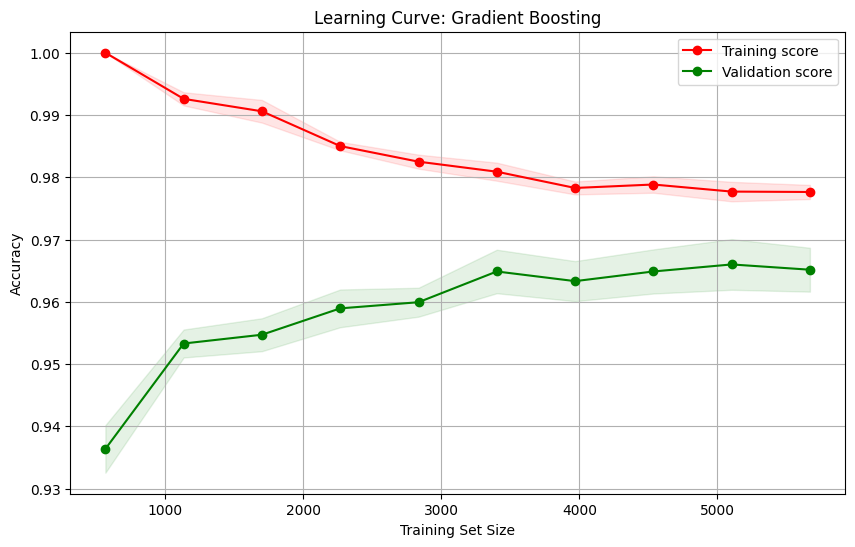

In [48]:
plot_learning_curve(GradientBoostingClassifier(random_state=42), X_train, y_train, "Learning Curve: Gradient Boosting")


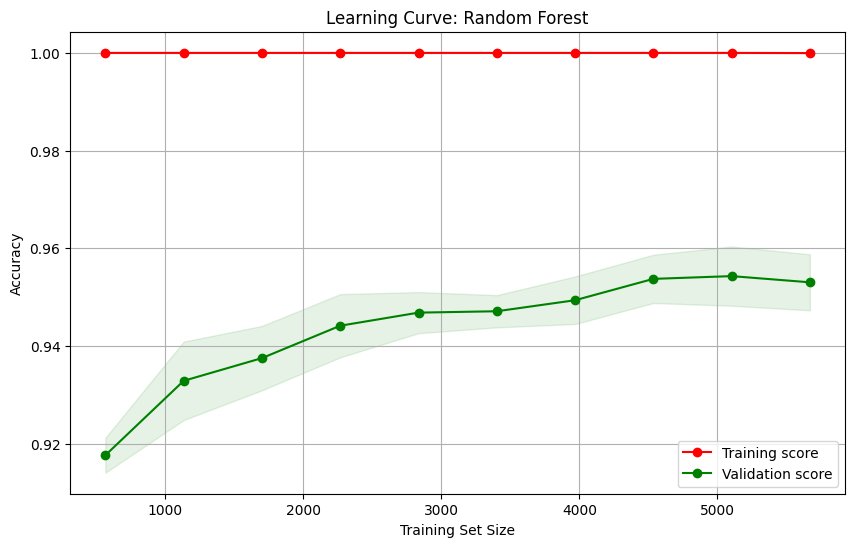

In [49]:
plot_learning_curve(RandomForestClassifier(random_state=42), X_train, y_train, "Learning Curve: Random Forest")


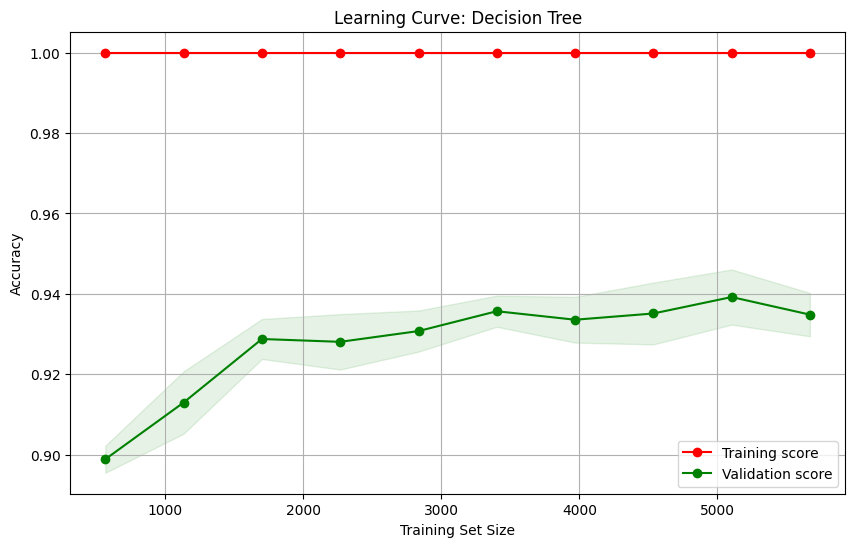

In [50]:
plot_learning_curve(DecisionTreeClassifier(random_state=42), X_train, y_train, "Learning Curve: Decision Tree")


#Evaluacion final


Se utiliza AUC ya que el dataset esta desbalanceado, el número de clientes que permanecen con el banco (Existing Customer) es significativamente mayor que el número de clientes que abandonan el banco (Attrited Customer)

In [58]:
best_gb_model = grid_search_gb.best_estimator_

# Hacer predicciones con el conjunto de prueba
y_pred = best_gb_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy:.4f}")

# Generar el reporte de clasificación
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))

y_prob = grid_search_gb.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.4f}")




Accuracy del modelo: 0.9697

Reporte de clasificación:
                    precision    recall  f1-score   support

Attrited Customer       0.92      0.89      0.91       496
Existing Customer       0.98      0.99      0.98      2543

         accuracy                           0.97      3039
        macro avg       0.95      0.94      0.94      3039
     weighted avg       0.97      0.97      0.97      3039


Matriz de confusión:
 [[ 442   54]
 [  38 2505]]
AUC: 0.9934


#Conclusion#

Los resultados muestran un accuracy de 0.9697 y un AUC de 0.9934, lo que indica que el modelo tiene una alta efectividad para predecir el abandono de clientes.
Con respecto a la precision 0.92 para la clase Attrited Customer muestra que el modelo identifica correctamente a la mayoría de los clientes que abandonan el banco.
El valor de recall 0.89 indica que el modelo detecta a la mayoría de los clientes propensos a abandonar.
El F1-score 0.91 confirma que el modelo logra un buen equilibrio entre ambos tiene excelente rendimiento para predecir la permanencia o no de un cliente en el banco.